In [1]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [25]:
df = pd.read_csv("crime_std.csv")

In [26]:
df.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,0,0.746988,0.654110,0.440678,0.359173
1,1,0.554217,0.746575,0.271186,0.961240
2,2,0.439759,0.852740,0.813559,0.612403
3,3,0.481928,0.496575,0.305085,0.315245
4,4,0.493976,0.791096,1.000000,0.860465


In [27]:
df.drop(df.columns[0],axis=1,inplace=True)
df.drop(['UrbanPop'],axis=1,inplace=True)

In [28]:
df

,Murder,Assault,Rape
0,0.746988,0.654110,0.359173
1,0.554217,0.746575,0.961240
2,0.439759,0.852740,0.612403
3,0.481928,0.496575,0.315245
4,0.493976,0.791096,0.860465
5,0.427711,0.544521,0.811370
6,0.150602,0.222603,0.098191
7,0.307229,0.660959,0.219638
8,0.879518,0.993151,0.635659
9,1.000000,0.568493,0.478036


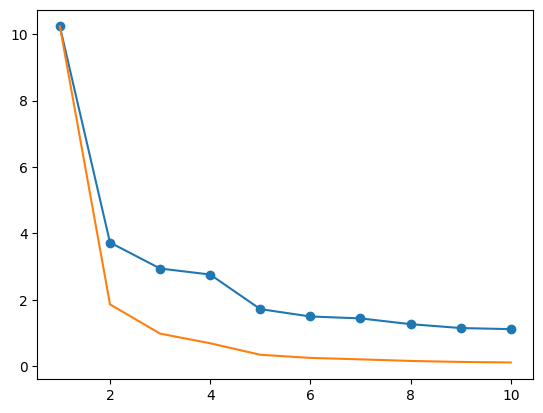

In [51]:
wscc = []
wsccn = []
for i in range(1,11):
    k = KMeans(n_clusters = i)
    k.fit(df)
    wscc.append(k.inertia_)
    wsccn.append(k.inertia_/i)

plt.plot(range(1,11),wscc)
plt.plot(range(1,11),wsccn)
plt.scatter(range(1,11),wscc)
    

In [29]:
#k =4
k = KMeans(n_clusters=4)
k.fit(df)


KMeans(n_clusters=4)

In [30]:
k.labels_

array([0, 2, 2, 3, 2, 2, 1, 3, 0, 0, 1, 1, 0, 3, 1, 3, 3, 0, 1, 0, 3, 2,
       1, 0, 3, 3, 1, 2, 1, 3, 2, 0, 0, 1, 3, 3, 3, 3, 1, 0, 1, 0, 0, 3,
       1, 3, 3, 1, 1, 3], dtype=int32)

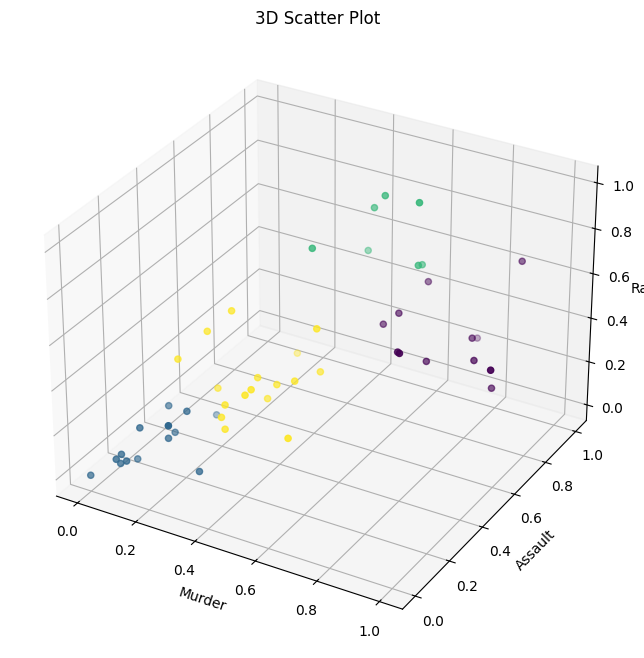

In [43]:
# x = df.columns[0][2:]
# y = df.columns[1][2:]
# z = df.columns[2][2:]
# # x = np.array(df.columns[0],dtype=np.float32)
# # y = np.array(df.columns[1],dtype=np.float32)
# # z = np.array(df.columns[2],dtype=np.float32)
# fig = plt.figure()
# ax = fig.add_subplot(projection='3d')
# ax.scatter(x, y, z)
# ax.show()
# # ax.set_xlabel('Murder')
# # ax.set_ylabel('Assault')
# # ax.set_zlabel('Rape')

Murder = df['Murder']
Assault = df['Assault']
Rape = df['Rape']

# Create the 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
ax.scatter(Murder, Assault, Rape, c=k.labels_, marker='o')

# Set labels and title
ax.set_xlabel('Murder')
ax.set_ylabel('Assault')
ax.set_zlabel('Rape')
ax.set_title('3D Scatter Plot')

plt.show()

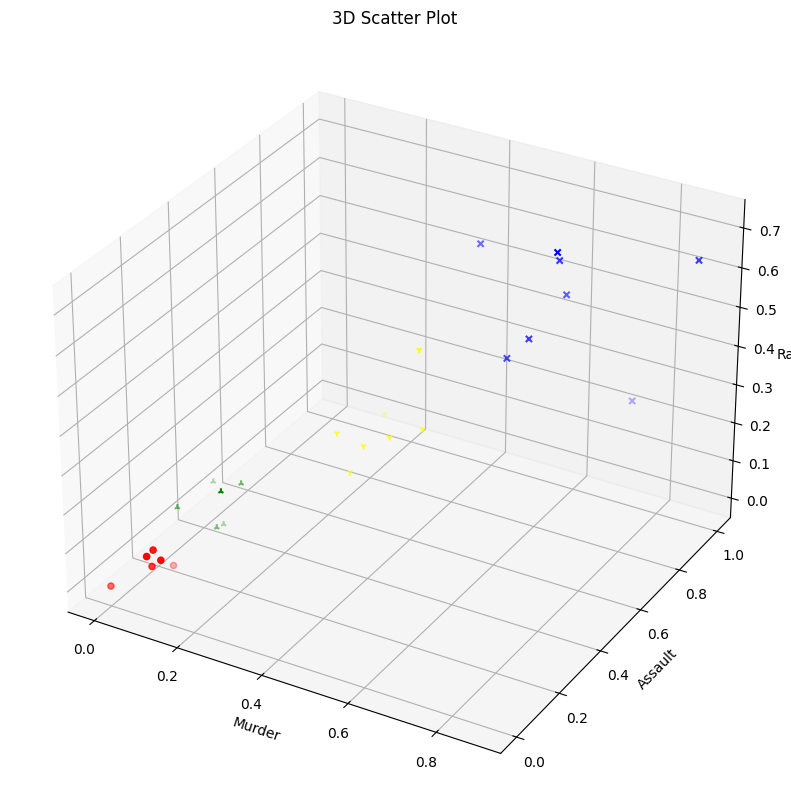

In [52]:
Murder = df['Murder']
Assault = df['Assault']
Rape = df['Rape']

# Create the 3D scatter plot
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
ax.scatter(Murder[k.labels_ == 0], Assault[k.labels_ == 0], Rape[k.labels_ == 0], marker='o',color ='red')
ax.scatter(Murder[k.labels_ == 1], Assault[k.labels_ == 1], Rape[k.labels_ == 1], marker='x',color ='blue')
ax.scatter(Murder[k.labels_ == 2], Assault[k.labels_ == 2], Rape[k.labels_ == 2], marker='1',color ='yellow')
ax.scatter(Murder[k.labels_ == 3], Assault[k.labels_ == 3], Rape[k.labels_ == 3], marker='2',color ='green')

# Set labels and title
ax.set_xlabel('Murder')
ax.set_ylabel('Assault')
ax.set_zlabel('Rape')
ax.set_title('3D Scatter Plot')

plt.show()